##Question 1

In [ ]:
import numpy as np

x = np.array([0.5, 3.0, 4.5, 4.6, 4.9, 5.2, 5.3, 5.5, 7.0, 9.5])
y = np.array(['-', '-', '+', '+', '+', '-', '-', '+', '-', '-'])
def knn_majority(query, k):
    distances = np.abs(x - query)
    sorted_indices = np.argsort(distances)
    neighbors = y[sorted_indices[:k]]
    unique, counts = np.unique(neighbors, return_counts=True)
    return unique[np.argmax(counts)]

print("1-NN:", knn_majority(5.0, 1))
print("3-NN:", knn_majority(5.0, 3))
print("5-NN:", knn_majority(5.0, 5))
print("9-NN:", knn_majority(5.0, 9))
print("******************************************part b ************************************************************")

def knn_weighted(query, k):
    distances = np.abs(x - query)
    sorted_indices = np.argsort(distances)[:k]
    weights = 1 / (distances[sorted_indices] + 1e-6)
    classes = y[sorted_indices]
    weighted_votes = {'+': 0, '-': 0}
    for cls, w in zip(classes, weights):
        weighted_votes[cls] += w
    return max(weighted_votes, key=weighted_votes.get)

print("1-NN (weighted):", knn_weighted(5.0, 1))
print("3-NN (weighted):", knn_weighted(5.0, 3))
print("9-NN (weighted):", knn_weighted(5.0, 9))


1-NN: +
3-NN: -
5-NN: +
9-NN: -
******************************************part b ************************************************************
1-NN (weighted): +
3-NN (weighted): +
9-NN (weighted): +


##Question 2

In [ ]:
# Home Owner could be modelled as follows for this :
home_owner = {
    'Yes': {'+': 3, '-': 2},
    'No': {'+': 4, '-': 6}
}

# Marital Status can be modelled as follows as Dr.Liu mentioned we could use a dictionary to model the data during office hours.
marital_status = {
    'Single': {'+': 2, '-': 3},
    'Married': {'+': 4, '-': 4},
    'Divorced': {'+': 1, '-': 1}
}

def mvdm(v1, v2, data):
    n1_total = sum(data[v1].values())
    n2_total = sum(data[v2].values())
    distance = 0
    for cls in ['+', '-']:
        distance += abs(data[v1][cls]/n1_total - data[v2][cls]/n2_total)
    return distance

print("Home Owner (Yes vs No):", mvdm('Yes', 'No', home_owner))
print("Marital Status (Single vs Married):", mvdm('Single', 'Married', marital_status))

Home Owner (Yes vs No): 0.3999999999999999
Marital Status (Single vs Married): 0.19999999999999996


##Question 3
##***All parts from a-d included ***

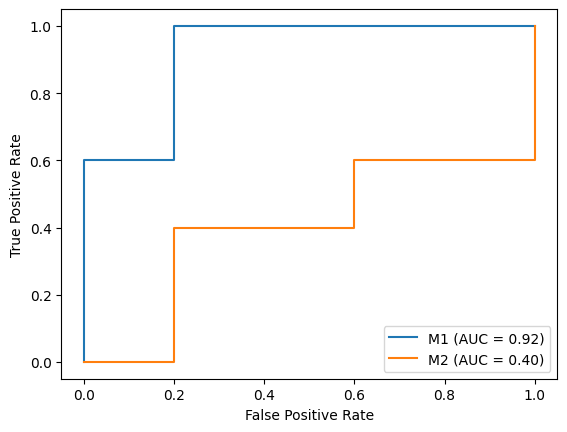

+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_  (0.75, 0.6, 0.6666666666666666) +_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_ 


In [ ]:
import pandas as pd

data = pd.DataFrame({
    'True Class': ['+', '+', '-', '-', '+', '+', '-', '-', '+', '-'],
    'M1': [0.73, 0.69, 0.44, 0.55, 0.67, 0.47, 0.08, 0.15, 0.45, 0.35],
    'M2': [0.61, 0.03, 0.68, 0.31, 0.45, 0.09, 0.38, 0.05, 0.01, 0.04]
})

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(y_true, probs, label):
    fpr, tpr, _ = roc_curve(y_true, probs, pos_label='+')
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure()
plot_roc(data['True Class'], data['M1'], 'M1')
plot_roc(data['True Class'], data['M2'], 'M2')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(probabilities, threshold, true_labels):
    preds = ['+' if p > threshold else '-' for p in probabilities]
    precision = precision_score(true_labels, preds, pos_label='+')
    recall = recall_score(true_labels, preds, pos_label='+')
    f1 = f1_score(true_labels, preds, pos_label='+')
    return precision, recall, f1
#I am taking M1 as t=0.5 for this case

print("+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_ ",evaluate_model(data['M1'], 0.5, data['True Class']),"+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_ ")

##Question 4

## Solutions to this question is given in the Google Drive document



##Question 5


Error Rate =
Total Test Instances/Number of Negatives
​

In [ ]:
def expected_error(true_ratio, pred_positive_prob):

    error = (1 - true_ratio) * pred_positive_prob + true_ratio * (1 - pred_positive_prob)
    return error

print("Part (a):", expected_error(0.5, 1.0))
print("Part (b):", expected_error(0.5, 0.8))
print("Part (c):", expected_error(2/3, 1.0))
print("Part (d):", expected_error(2/3, 2/3))

Part (a): 0.5
Part (b): 0.5
Part (c): 0.33333333333333337
Part (d): 0.4444444444444445


##Question 6


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

np.random.seed(42)

random_numbers = np.random.rand(120)
labels = np.array([1]*60 + [-1]*60)
dataset = pd.DataFrame({'Random_Value': random_numbers, 'Class': labels}).sample(frac=1).reset_index(drop=True)
dataset.to_csv("training_dataset.csv", index=False)

random_numbers_test = np.random.rand(120)
labels_test = np.array([1]*60 + [-1]*60)
testing_dataset = pd.DataFrame({'Random_Value': random_numbers_test, 'Class': labels_test}).sample(frac=1).reset_index(drop=True)
testing_dataset.to_csv("testing_dataset.csv", index=False)

random_numbers_b = np.random.rand(100)
labels_b = np.array([1]*80 + [-1]*20)
dataset_b = pd.DataFrame({'Random_Value': random_numbers_b, 'Class': labels_b}).sample(frac=1).reset_index(drop=True)
dataset_b.to_csv("dataset_b.csv", index=False)

random_numbers_d = np.random.rand(100)
labels_d = np.array([1]*80 + [-1]*20)
dataset_d = pd.DataFrame({'Random_Value': random_numbers_d, 'Class': labels_d}).sample(frac=1).reset_index(drop=True)
dataset_d.to_csv("dataset_d.csv", index=False)

train_data = pd.read_csv("training_dataset.csv")
test_data = pd.read_csv("testing_dataset.csv")
X_train, y_train = train_data[['Random_Value']], train_data['Class']
X_test, y_test = test_data[['Random_Value']], test_data['Class']

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

dataset_d = pd.read_csv("dataset_d.csv")
X_d, y_d = dataset_d[['Random_Value']], dataset_d['Class']
clf.fit(X_d, y_d)
y_pred_d = clf.predict(X_d)
accuracy_d = accuracy_score(y_d, y_pred_d)
print(f"Decision Tree Accuracy on dataset_d: {accuracy_d:.2f}")


Decision Tree Accuracy: 0.42
Decision Tree Accuracy on dataset_d: 1.00


##Question 7
PCA helps reduce dimensionality while retaining most variance.

Decision Tree on original data performs better, but PCA-reduced data still provides good classification.

PCA is useful for visualization and reducing noise, but some information loss occurs.

In [ ]:
import numpy as np
import pandas as pd
from numpy.linalg import svd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets

iris = datasets.load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X = iris_df.iloc[:, :-1].values

X_centered = X - X.mean(axis=0)

U, s, Vt = svd(X_centered)

c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
explained_variance = (s ** 2) / np.sum(s ** 2)
variance_captured = explained_variance[:2].sum()

print("Principal Component 1:", c1)
print("Principal Component 2:", c2)
print("Variance Captured by First Two Components:", variance_captured)

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)

print("Principal Components from Sklearn PCA:\n", pca.components_)
print("Variance Captured by First Two Components:", cumsum[1])
y = iris.target  # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf_original = DecisionTreeClassifier(random_state=42)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X2D, y, test_size=0.2, random_state=42)
clf_pca = DecisionTreeClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)

print("Decision Tree Accuracy on Original Dataset:", accuracy_original)
print("Decision Tree Accuracy on PCA-Transformed Dataset:", accuracy_pca)

Principal Component 1: [ 0.38983343 -0.09100801  0.91637735]
Principal Component 2: [-0.63922328 -0.74305866  0.19813487]
Variance Captured by First Two Components: 0.9851065996291114
Principal Components from Sklearn PCA:
 [[ 0.38983343 -0.09100801  0.91637735]
 [ 0.63922328  0.74305866 -0.19813487]]
Variance Captured by First Two Components: 0.985106599629115
Decision Tree Accuracy on Original Dataset: 1.0
Decision Tree Accuracy on PCA-Transformed Dataset: 0.9333333333333333


##Question 8


Random Split Selection:

In Random Forest, each decision tree splits a node by selecting the best feature and the best threshold based on a criterion

In Extra-Trees, both the feature and the split threshold are chosen randomly, rather than selecting the best threshold.

No Bootstrapping (No Resampling):

Random Forest builds trees using bootstrap sampling (sampling with replacement).

Extra-Trees do not use bootstrapping; they train on the entire dataset, making them computationally more efficient.

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sonar = pd.read_csv("/content/sonar_test (1).csv")
X = sonar.iloc[:, :-1].values
y = sonar.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf.fit(X_train, y_train)
rf_train_time = time.time() - start_time

et = ExtraTreesClassifier(n_estimators=100, random_state=42)
start_time = time.time()
et.fit(X_train, y_train)
et_train_time = time.time() - start_time

print("Training Time (Random Forest):", rf_train_time)
print("Training Time (Extra-Trees):", et_train_time)


Training Time (Random Forest): 0.1556689739227295
Training Time (Extra-Trees): 0.10246109962463379


In [ ]:
sonar_test = pd.read_csv("/content/sonar_test (1).csv")
X_test_sonar = sonar_test.iloc[:, :-1].values
y_test_sonar = sonar_test.iloc[:, -1].values
y_pred_rf = rf.predict(X_test_sonar)
rf_accuracy = accuracy_score(y_test_sonar, y_pred_rf)
y_pred_et = et.predict(X_test_sonar)
et_accuracy = accuracy_score(y_test_sonar, y_pred_et)

print("Accuracy (Random Forest):", rf_accuracy)
print("Accuracy (Extra-Trees):", et_accuracy)


Accuracy (Random Forest): 0.935064935064935
Accuracy (Extra-Trees): 0.948051948051948


##Question 9

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


bank_data = pd.read_csv("/content/UniversalBank - Copy.csv")

X = bank_data.drop(columns=["Personal Loan"])
y = bank_data["Personal Loan"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
bagging_acc = accuracy_score(y_test, y_pred_bagging)

adaboost_clf = AdaBoostClassifier(estimator=base_clf, n_estimators=50, random_state=42)
adaboost_clf.fit(X_train, y_train)
y_pred_adaboost = adaboost_clf.predict(X_test)
adaboost_acc = accuracy_score(y_test, y_pred_adaboost)


print("Bagging Accuracy:", bagging_acc)
print("AdaBoost Accuracy:", adaboost_acc)

Bagging Accuracy: 0.985
AdaBoost Accuracy: 0.991


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target

param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [3, 5, 10]
}

inner_cv = 3
outer_cv = 3

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=inner_cv, scoring="accuracy")
nested_scores = cross_val_score(grid_search, X, y, cv=outer_cv)

print("Nested Cross-Validation Accuracy Scores:", nested_scores)
print("Mean Accuracy:", np.mean(nested_scores))



Nested Cross-Validation Accuracy Scores: [0.98 0.94 0.98]
Mean Accuracy: 0.9666666666666667


## KNN comparison


Majority Vote Classification: {1: np.int64(1), 3: np.int64(1), 5: np.int64(1), 9: np.int64(1)}
Distance-Weighted Vote Classification: {1: np.int64(1), 3: np.int64(1), 5: np.int64(1), 9: np.int64(1)}


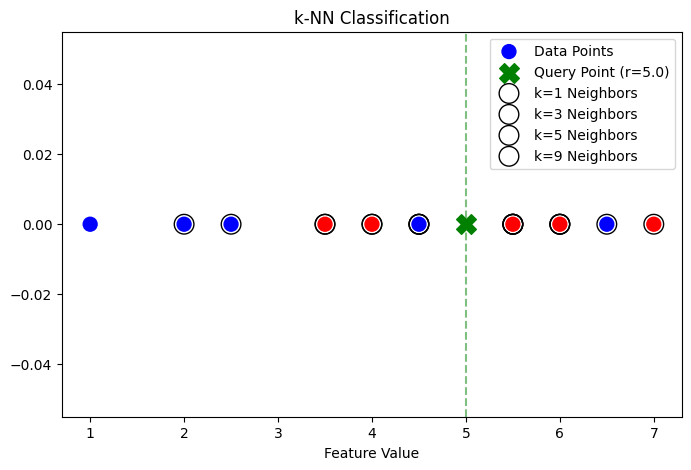

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

data_points = np.array([1.0, 2.0, 2.5, 3.5, 4.0, 4.5, 5.5, 6.0, 6.5, 7.0])
labels = np.array([-1, -1, -1, 1, 1, -1, 1, 1, -1, 1])
r = 5.0

distances = np.abs(data_points - r)
sorted_indices = np.argsort(distances)
sorted_distances = distances[sorted_indices]
sorted_labels = labels[sorted_indices]

def knn_majority_vote(k):
    nearest_labels = sorted_labels[:k]
    return Counter(nearest_labels).most_common(1)[0][0]

def knn_distance_weighted_vote(k):
    nearest_distances = sorted_distances[:k]
    nearest_labels = sorted_labels[:k]
    weights = 1 / (nearest_distances + 1e-5)
    weighted_votes = {}

    for label, weight in zip(nearest_labels, weights):
        weighted_votes[label] = weighted_votes.get(label, 0) + weight

    return max(weighted_votes, key=weighted_votes.get)

k_values = [1, 3, 5, 9]
majority_vote_results = {k: knn_majority_vote(k) for k in k_values}
distance_weighted_results = {k: knn_distance_weighted_vote(k) for k in k_values}

print("Majority Vote Classification:", majority_vote_results)
print("Distance-Weighted Vote Classification:", distance_weighted_results)

plt.figure(figsize=(8, 5))
plt.scatter(data_points, np.zeros_like(data_points), c=labels, cmap='bwr', s=100, label="Data Points")
plt.scatter(r, 0, c='green', marker='X', s=200, label="Query Point (r=5.0)")

for k in k_values:
    k_neighbors = data_points[sorted_indices[:k]]
    plt.scatter(k_neighbors, np.zeros_like(k_neighbors), edgecolors='black', facecolors='none', s=200, label=f'k={k} Neighbors')

plt.axvline(r, color='green', linestyle='--', alpha=0.5)
plt.xlabel("Feature Value")
plt.title("k-NN Classification")
plt.legend()
plt.show()
